In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

SIMILARITY_THRESHOLD = 0.85 # Keeps pairs with a similarity score >= 85%
MIN_WORDS = 5              # Removes sentences with fewer than 5 words
MAX_WORDS = 128            # Removes sentences with more than 128 words

# --- Load the Dataset ---
df = pd.read_csv('cleaned_03_24.csv')
print("✅ Step 1: Dataset loaded successfully.")
print(f"Original dataset size: {len(df)} pairs")
print("-" * 30)

✅ Step 1: Dataset loaded successfully.
Original dataset size: 17196 pairs
------------------------------


✅ Step 2: Analyzing similarity scores...


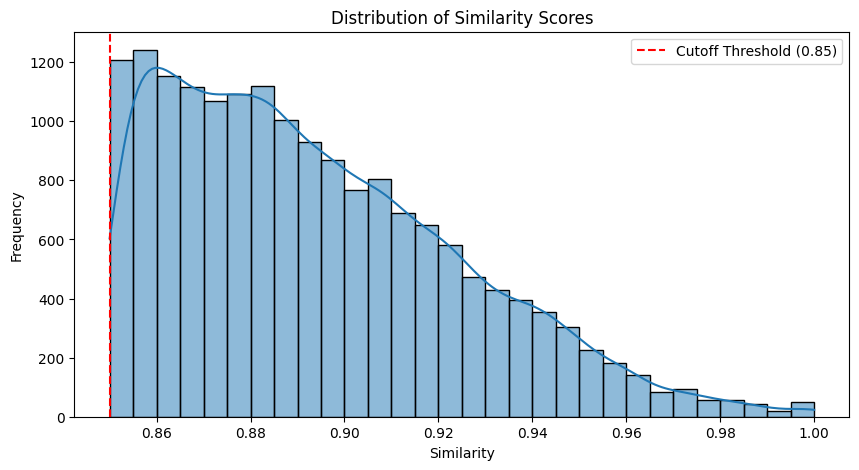

In [2]:
print("✅ Step 2: Analyzing similarity scores...")
plt.figure(figsize=(10, 5))
sns.histplot(df['similarity'], kde=True, bins=30)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.axvline(SIMILARITY_THRESHOLD, color='r', linestyle='--', label=f'Cutoff Threshold ({SIMILARITY_THRESHOLD})')
plt.legend()
plt.show()

In [3]:
def clean_text(text):
    """A function to clean up text artifacts."""
    if not isinstance(text, str):
        return ""
    # 1. Re-join words that were split by a hyphen and a newline/space
    text = re.sub(r'-\s+', '', text)
    # 2. Remove excessive whitespace (multiple spaces, tabs, newlines)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [4]:
original_count = len(df)

# Rule 1: Apply text cleaning to both columns
df['english'] = df['english'].apply(clean_text)
df['german'] = df['german'].apply(clean_text)

# Rule 2: Drop rows where either sentence is empty after cleaning
df = df[df['english'].str.len() > 0]
df = df[df['german'].str.len() > 0]
print(f"   - Removed {original_count - len(df)} rows with empty text.")
count_after_empty_removal = len(df)

# Rule 3: Filter by similarity score
df = df[df['similarity'] >= SIMILARITY_THRESHOLD]
print(f"   - Removed {count_after_empty_removal - len(df)} rows with similarity < {SIMILARITY_THRESHOLD}.")
count_after_similarity_filter = len(df)

# Rule 4: Filter by sentence length (word count)
df = df[df['english'].str.split().str.len().between(MIN_WORDS, MAX_WORDS)]
df = df[df['german'].str.split().str.len().between(MIN_WORDS, MAX_WORDS)]
print(f"   - Removed {count_after_similarity_filter - len(df)} rows with sentence length outside {MIN_WORDS}-{MAX_WORDS} words.")

# Rule 5: Drop any duplicate pairs that might exist
final_count = len(df)
df.drop_duplicates(subset=['english', 'german'], inplace=True)
print(f"   - Removed {final_count - len(df)} duplicate pairs.")

print("-" * 30)
print(f"Final cleaned dataset size: {len(df)} pairs")
print(f"Total rows removed: {original_count - len(df)}")

output_filename = 'financial_dataset_cleaned.csv'
df.to_csv(output_filename, index=False, encoding='utf-8')
print(f"\n✅ Step 4: Cleaned dataset saved as '{output_filename}'")
print("\nFirst 5 rows of the cleaned data:")
print(df.head())

   - Removed 0 rows with empty text.
   - Removed 0 rows with similarity < 0.85.
   - Removed 612 rows with sentence length outside 5-128 words.
   - Removed 2530 duplicate pairs.
------------------------------
Final cleaned dataset size: 14054 pairs
Total rows removed: 3142

✅ Step 4: Cleaned dataset saved as 'financial_dataset_cleaned.csv'

First 5 rows of the cleaned data:
                                             english  \
0  Allianz is one of the leading global services ...   
1  In 2003, we focused our efforts on the followi...   
2  The combined ratio decreased 8.7 percentage po...   
3  We also made substantial progress in cost mana...   
4  Allianz is one of the five leading asset manag...   

                                              german  similarity  
0  Die Allianz ist einer der führenden globalen D...    0.951444  
1  Im Geschäftsjahr 2003 konzentrierten wir uns a...    0.884595  
2  Die Combined Ratio wurde um 8,7 Prozentpunkte ...    0.949442  
3  Große Fortsch

In [5]:
!pip install transformers[torch] datasets evaluate sacrebleu pandas --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [6]:
import pandas as pd
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer
)

In [7]:
df = pd.read_csv('financial_dataset_cleaned.csv')
df = df.rename(columns={'english': 'en', 'german': 'de'})
df['translation'] = df.apply(lambda row: {'en': row['en'], 'de': row['de']}, axis=1)

df = df[['translation']]

# Split the data into a training set (90%) and a validation set (10%)
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

train_dataset = Dataset.from_pandas(train_df, preserve_index=False)
val_dataset = Dataset.from_pandas(val_df, preserve_index=False)

raw_datasets = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset
})

print("✅ Dataset prepared and split:")
print(raw_datasets)

✅ Dataset prepared and split:
DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 12648
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 1406
    })
})


In [8]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-de"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    source_lang = "en"
    target_lang = "de"

    inputs = [ex[source_lang] for ex in examples["translation"]]
    targets = [ex[target_lang] for ex in examples["translation"]]

    # Tokenize the English text for the model's input
    model_inputs = tokenizer(inputs, max_length=128, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply the tokenization function to our entire dataset
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
print("✅ Tokenization complete.")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

source.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Map:   0%|          | 0/12648 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:4006: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/1406 [00:00<?, ? examples/s]

✅ Tokenization complete.


In [9]:
from transformers import (
    AutoModelForSeq2SeqLM,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer
)

print("⏳ Step 1: Loading the pre-trained Helsinki-NLP model...")
# Define the model we are fine-tuning
model_checkpoint = "Helsinki-NLP/opus-mt-en-de"
# Load the model architecture
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)
print("✅ Model loaded.")

print("\n⏳ Step 2: Configuring training arguments...")

training_args = Seq2SeqTrainingArguments(
    output_dir="./financial_translator_en_de",
    # --- FIX IS HERE ---
    # Renamed 'evaluation_strategy' to 'eval_strategy' for compatibility with your library version.
    eval_strategy="epoch",
    # -------------------
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=10,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True,
)
print("✅ Training arguments configured correctly.")
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],   # Your tokenized training data
    eval_dataset=tokenized_datasets["validation"], # Your tokenized validation data
    tokenizer=tokenizer,
    data_collator=data_collator,
)
print("✅ Trainer initialized.")
trainer.train()
print("\n🎉 Fine-tuning complete! Your specialized model is now saved in the 'financial_translator_en_de' directory.")

⏳ Step 1: Loading the pre-trained Helsinki-NLP model...


pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

✅ Model loaded.

⏳ Step 2: Configuring training arguments...
✅ Training arguments configured correctly.


/tmp/ipython-input-3442742493.py:35: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


✅ Trainer initialized.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: xzwyn7 (xzwyn7-amrita-vishwa-vidyapeetham) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,1.159700,0.916287
2,0.888300,0.846012
3,0.789000,0.811148
4,0.676000,0.791888
5,0.632800,0.784991
6,0.555500,0.775646
7,0.524500,0.769684
8,0.491600,0.769297
9,0.471500,0.769139
10,0.463400,0.768626


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3917: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 512, 'num_beams': 4, 'bad_words_ids': [[58100]]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(



🎉 Fine-tuning complete! Your specialized model is now saved in the 'financial_translator_en_de' directory.


In [10]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

print("⏳ Loading your fine-tuned financial translation model...")

# --- FIX IS HERE ---
model_path = "/content/financial_translator_en_de/checkpoint-7910"
tokenizer = AutoTokenizer.from_pretrained(model_path)

model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

translator = pipeline("translation", model=model, tokenizer=tokenizer)

print("✅ Model loaded successfully!")

# --- Now you can test your model ---
sentence = "Consolidated revenue was impacted by currency fluctuations."
result = translator(sentence)
print(f"\nTranslation: {result[0]['translation_text']}")

⏳ Loading your fine-tuned financial translation model...


/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


✅ Model loaded successfully!

Translation: Der Konzernumsatz wurde durch Währungsschwankungen beeinflusst.


In [11]:
final_model_dir = "./final_financial_translator"
model.save_pretrained(final_model_dir)
tokenizer.save_pretrained(final_model_dir)
!zip -r final_financial_translator.zip ./final_financial_translator

  adding: final_financial_translator/ (stored 0%)
  adding: final_financial_translator/source.spm (deflated 49%)
  adding: final_financial_translator/config.json (deflated 62%)
  adding: final_financial_translator/vocab.json (deflated 69%)
  adding: final_financial_translator/tokenizer_config.json (deflated 68%)
  adding: final_financial_translator/model.safetensors (deflated 7%)
  adding: final_financial_translator/special_tokens_map.json (deflated 73%)
  adding: final_financial_translator/target.spm (deflated 49%)
  adding: final_financial_translator/generation_config.json (deflated 43%)


In [13]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

print("⏳ Loading your fine-tuned financial translation model...")

# --- FIX IS HERE ---
model_path = "/content/financial_translator_en_de/checkpoint-7910"
tokenizer = AutoTokenizer.from_pretrained(model_path)

model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

translator = pipeline("translation", model=model, tokenizer=tokenizer)

print("✅ Model loaded successfully!")

# --- Now you can test your model ---
sentence = "In many countries – especially Italy, France and the U.S. – the sale of investment-oriented products has already surpassed that of traditional life insurance products. Although growth slowed in fiscal 2001, mainly as a result of poor stock market performance, we expect above-average growth in the fund-linked life insurance business in the years to come. The fact that the underlying funds of these products are to an increasing extent funds of our own Asset Management division will give the investment-oriented business an additional boost."
result = translator(sentence)
print(f"\nTranslation: {result[0]['translation_text']}")

⏳ Loading your fine-tuned financial translation model...


Device set to use cuda:0


✅ Model loaded successfully!

Translation: In vielen Ländern – insbesondere in Italien, Frankreich und den USA – hat der Verkauf von investmentorientierten Produkten bereits die traditionellen Lebensversicherungsprodukte übertroffen. Obgleich sich das Wachstum im Geschäftsjahr 2001 vor allem wegen der schwachen Marktperformance verlangsamte, erwarten wir in den kommenden Jahren ein überdurchschnittliches Wachstum im fondsgebundenen Lebensversicherungsgeschäft.


In [12]:
!pip install -q bert-score

from bert_score import score

candidate = "Außerdem bieten wir unseren Kunden Lebensversicherungen und Pensionslösungen an."
reference = "Ferner bieten wir unseren Kunden Lebensversicherungen und Lösungen für die Altersvorsorge an."

candidates = [candidate]
references = [reference]

P, R, F1 = score(candidates, references, lang="de", verbose=True)
print(f"BERTScore F1: {F1.mean():.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.2 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.13 seconds, 7.67 sentences/sec
BERTScore F1: 0.9059


In [15]:
!pip install -q unbabel-comet
from comet import download_model, load_from_checkpoint

source = "In many countries – especially Italy, France and the U.S. – the sale of investment-oriented products has already surpassed that of traditional life insurance products. Although growth slowed in fiscal 2001, mainly as a result of poor stock market performance, we expect above-average growth in the fund-linked life insurance business in the years to come. The fact that the underlying funds of these products are to an increasing extent funds of our own Asset Management division will give the investment-oriented business an additional boost."
candidate = "Translation: In vielen Ländern – insbesondere in Italien, Frankreich und den USA – hat der Verkauf von investmentorientierten Produkten bereits die traditionellen Lebensversicherungsprodukte übertroffen. Obgleich sich das Wachstum im Geschäftsjahr 2001 vor allem wegen der schwachen Marktperformance verlangsamte, erwarten wir in den kommenden Jahren ein überdurchschnittliches Wachstum im fondsgebundenen Lebensversicherungsgeschäft."
reference = "Schon jetzt übertrifft das anlageorientierte Geschäft den Verkauf traditioneller Lebensversicherungsprodukte in vielen Ländern deutlich, allen voran Italien, Frankreich und USA. Zwar fiel die Wachstumsdynamik im Berichtsjahr etwas gedämpfter aus, was in der schlechten Performance auf den Aktienmärkten begründet lag. Aber für die Folgejahre rechnen wir wieder mit überdurchschnittlichen Zuwachsraten im fondsgebundenen Lebensversicherungsgeschäft. Die Tatsache, dass wir diese Produkte zunehmend mit Fonds unseres eigenen Asset Managements unterlegen, wird dem anlageorientierten Geschäft zusätzliche Impulse verschaffen."

model_path = download_model("Unbabel/wmt22-comet-da")
model = load_from_checkpoint(model_path)
data = [{
    "src": source,
    "mt": candidate,
    "ref": reference
}]

model_output = model.predict(data, batch_size=8, gpus=1)
print(f"COMET-DA Score: {model_output.scores[0]:.4f}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.2/828.2 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 32.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatibl

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

LICENSE: 0.00B [00:00, ?B/s]

checkpoints/model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.5.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/2760a223ac957f30acfb18c8aa649b01cf1d75f2/checkpoints/model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']
INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]


COMET-DA Score: 0.8212
